# Bike Rental Statistics

In [615]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

## libraries for build model
import statsmodels
import statsmodels.api as sm

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [616]:
bike_rental_data_set = pd.read_csv('day.csv')
bike_rental_data_set.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Look at the data_set using  shape, info(), describe()

In [617]:
bike_rental_data_set.shape

(730, 16)

In [618]:
bike_rental_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [619]:
bike_rental_data_set.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [620]:
## Check for Null Values
bike_rental_data_set.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [621]:
### Rename the columns
bike_rental_data_set.rename(columns={'instant':'S.No','dteday':'Data_Time','yr':'year','mnth':'month','weathersit':'weather_condition',
                       'hum':'humidity','cnt':'count'},inplace=True)

In [622]:
#Mapping variables season, month, weathersit, weekday

bike_rental_data_set['season']=bike_rental_data_set.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bike_rental_data_set['month']=bike_rental_data_set.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike_rental_data_set['weather_condition']=bike_rental_data_set.weather_condition.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bike_rental_data_set['weekday']=bike_rental_data_set.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bike_rental_data_set.head()

,S.No,Data_Time,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [623]:
bike_rental_data_set.weather_condition.unique()

array(['Mist + Cloudy', 'Clear', 'Light Snow'], dtype=object)

## Visualising numeric variables

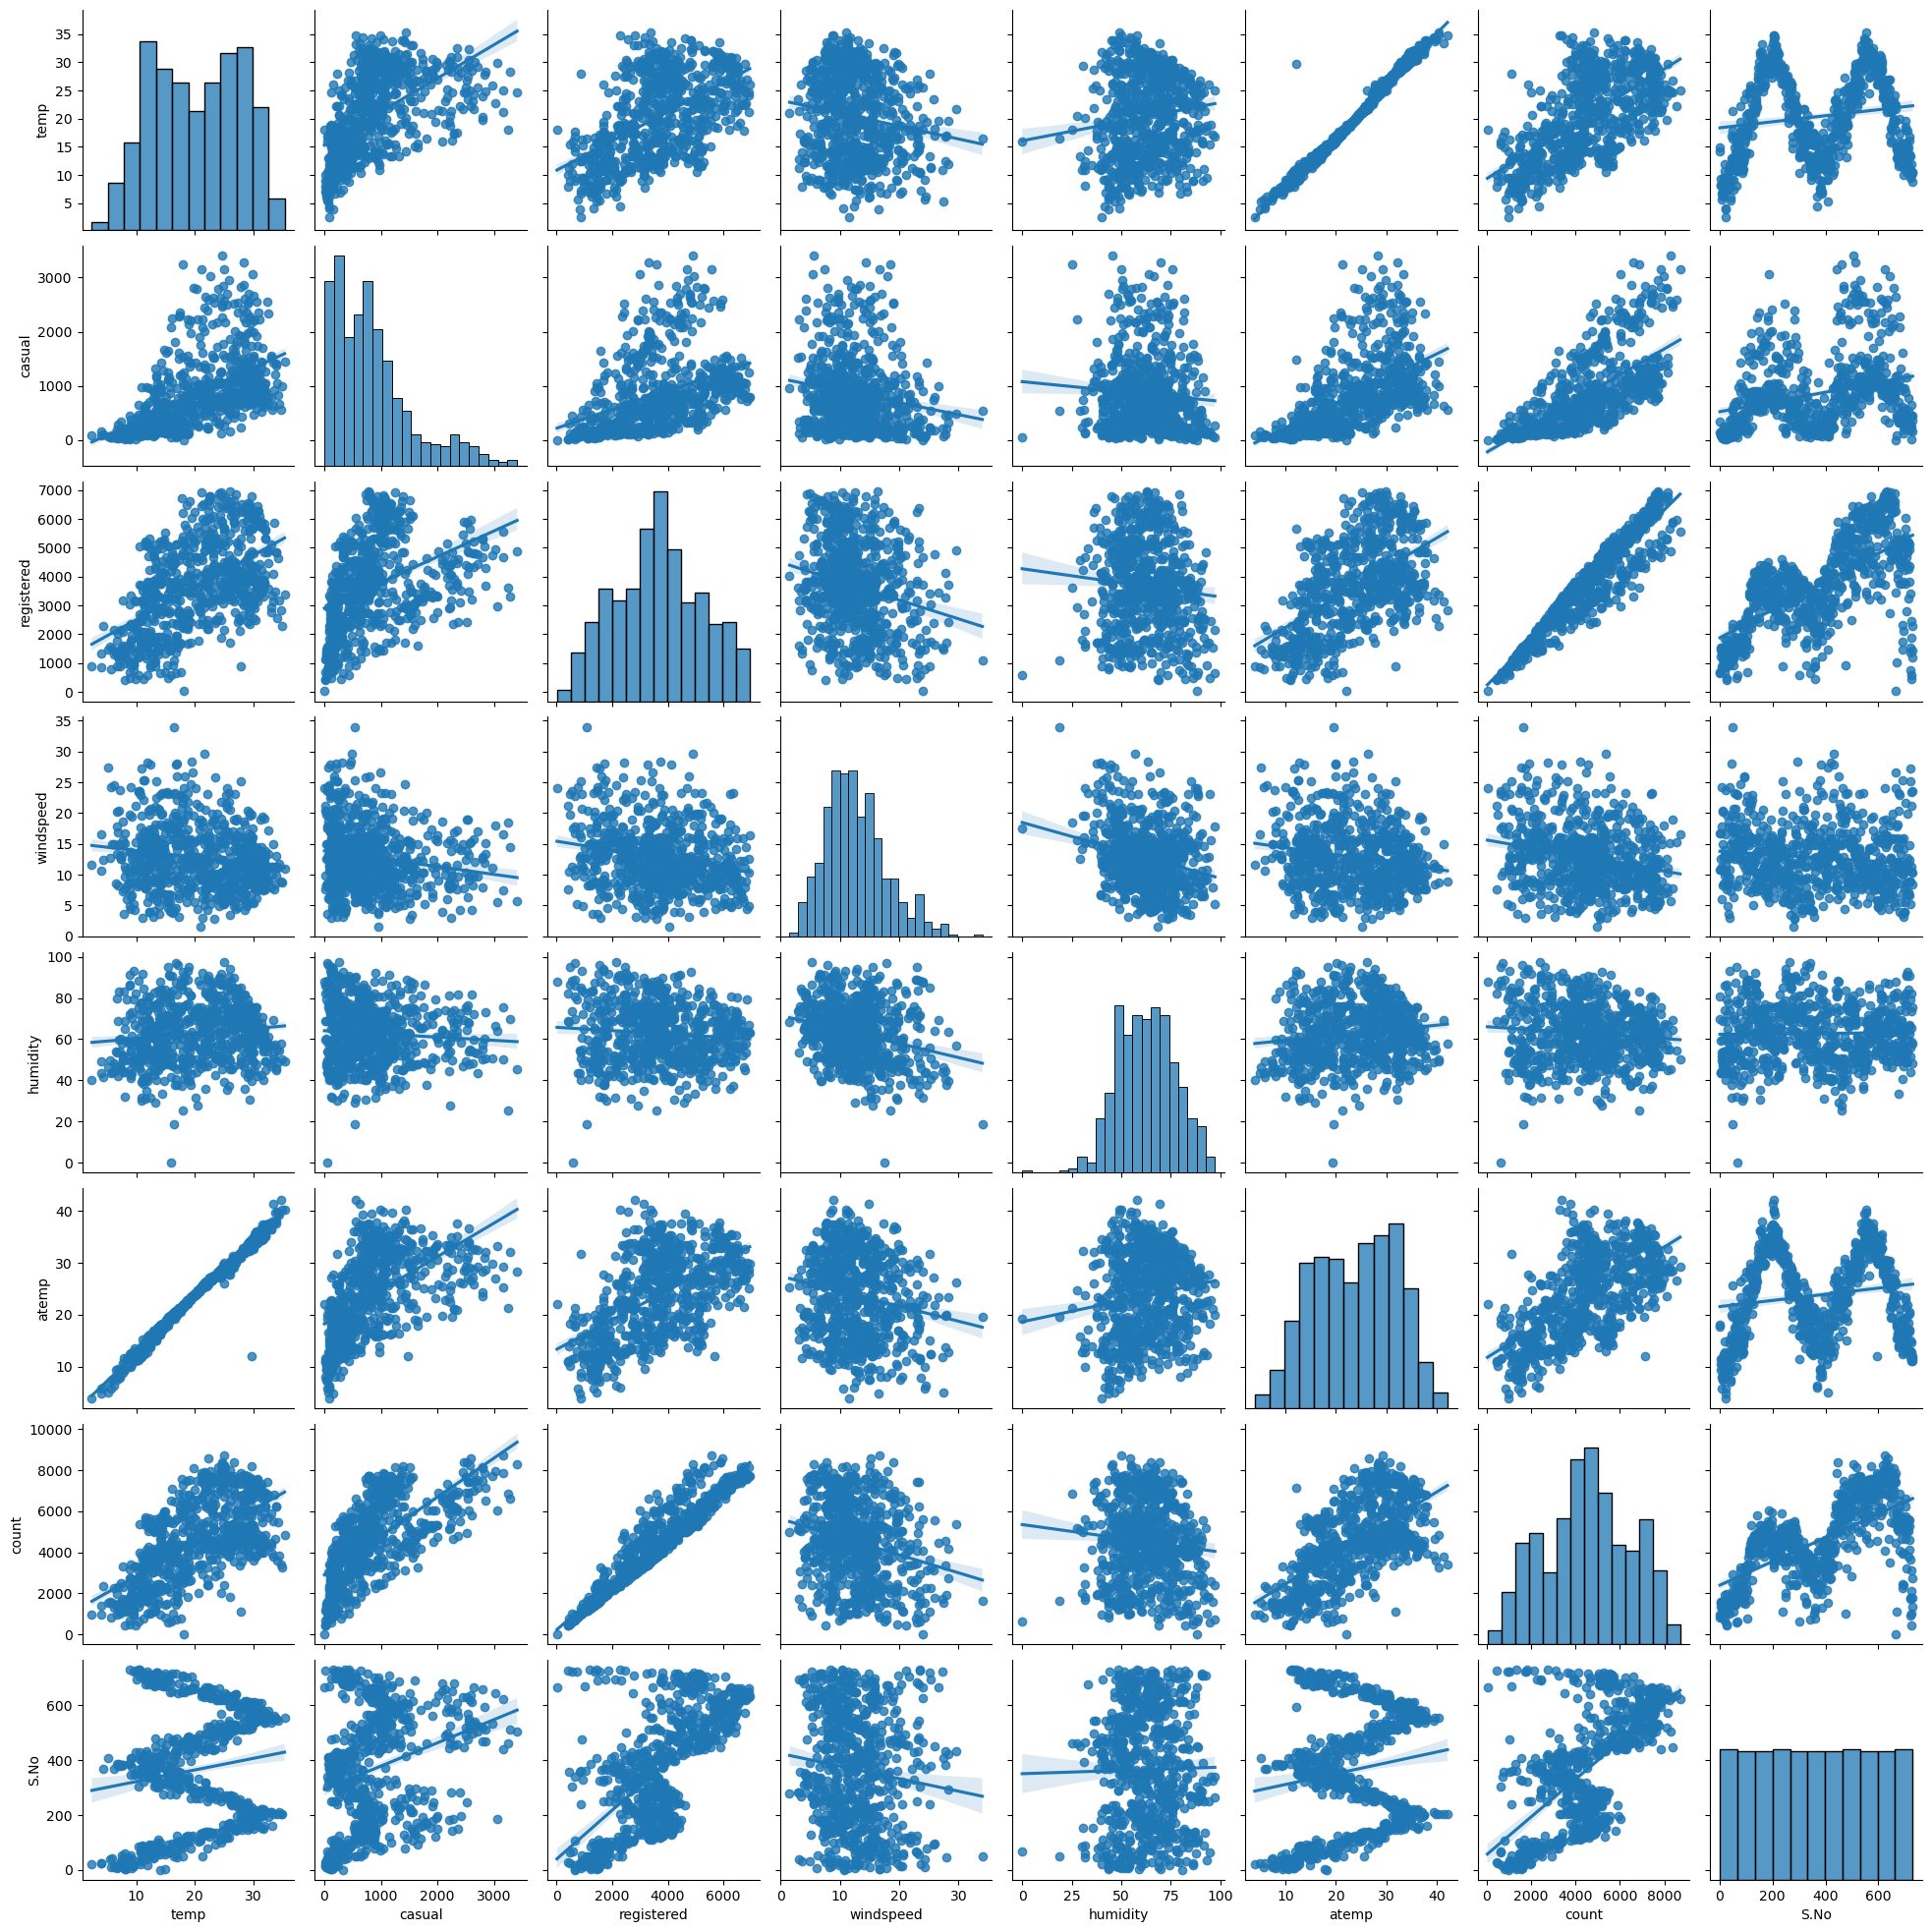

In [624]:


sns.pairplot(bike_rental_data_set, vars= ["temp", "casual", 
    "registered", "windspeed", "humidity", "atemp", "count", "S.No"],kind = 'reg')

plt.show()


In [625]:
## Bike Rentals is correlated with temprature.

## Visualising categorical variables

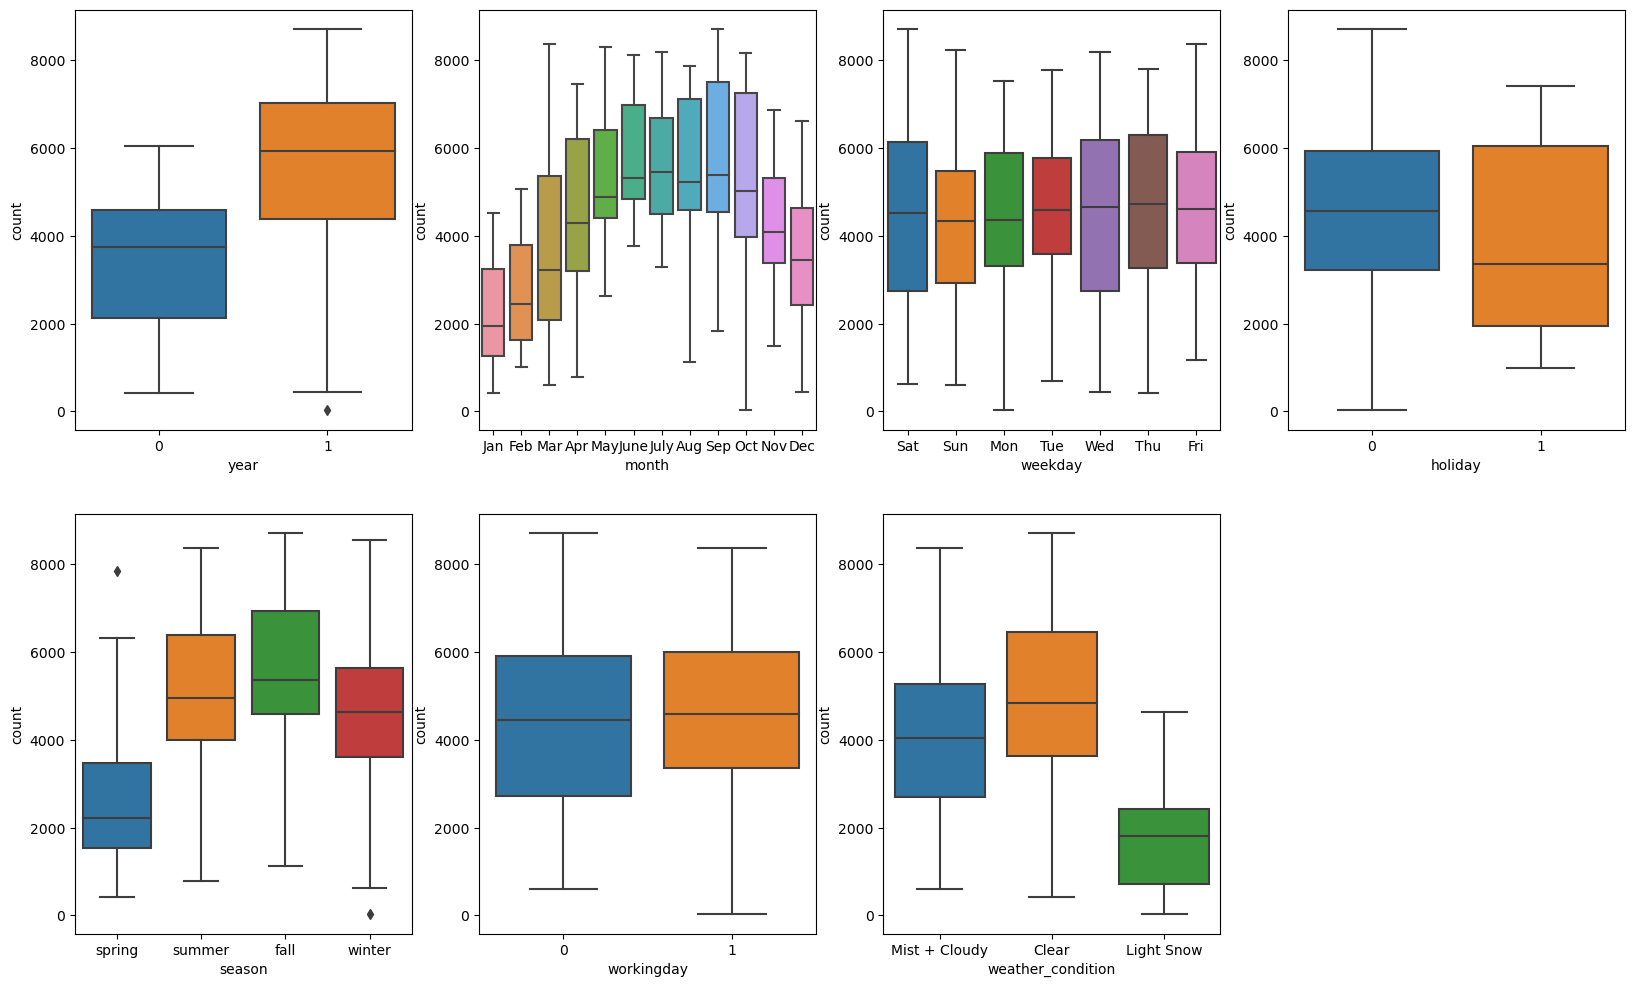

In [626]:

plt.figure(figsize =(20,12))
plt.subplot(2,4,1)
sns.boxplot(x='year', y='count', data=bike_rental_data_set)
plt.subplot(2,4,2)
sns.boxplot(x='month', y='count', data=bike_rental_data_set)
plt.subplot(2,4,3)
sns.boxplot(x='weekday', y='count', data=bike_rental_data_set)
plt.subplot(2,4,4)
sns.boxplot(x='holiday', y='count', data=bike_rental_data_set)
plt.subplot(2,4,5)
sns.boxplot(x='season', y='count', data=bike_rental_data_set)
plt.subplot(2,4,6)
sns.boxplot(x='workingday', y='count', data=bike_rental_data_set)
plt.subplot(2,4,7)
sns.boxplot(x='weather_condition', y='count', data=bike_rental_data_set)
plt.show()

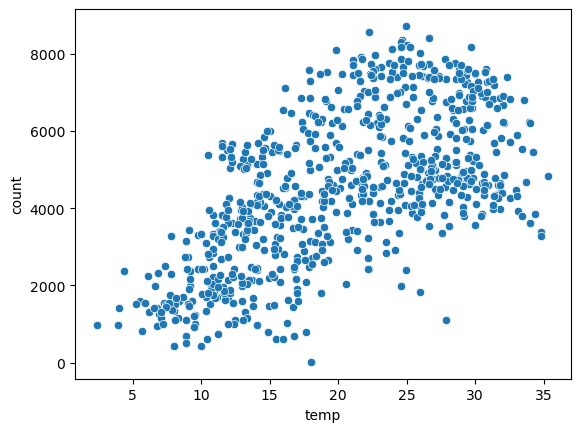

In [672]:
#scatter plot for temperature to count
sns.scatterplot(x='temp',y='count' ,data=bike_rental_data_set)
plt.show()

In [627]:
## Bike Rentals are more in season 2 (summer) and 3 (Fall) and declines in 4(winters) and 1(sprint)
## Bike Rentals are more in 2019 than 2018
## Bike Renatls are more in Coludy weather conditions
## Bike Rentals are more on Wednesday and Thrusday
## Bike Rentals demands increases stays and on peak from month may till october then decreases


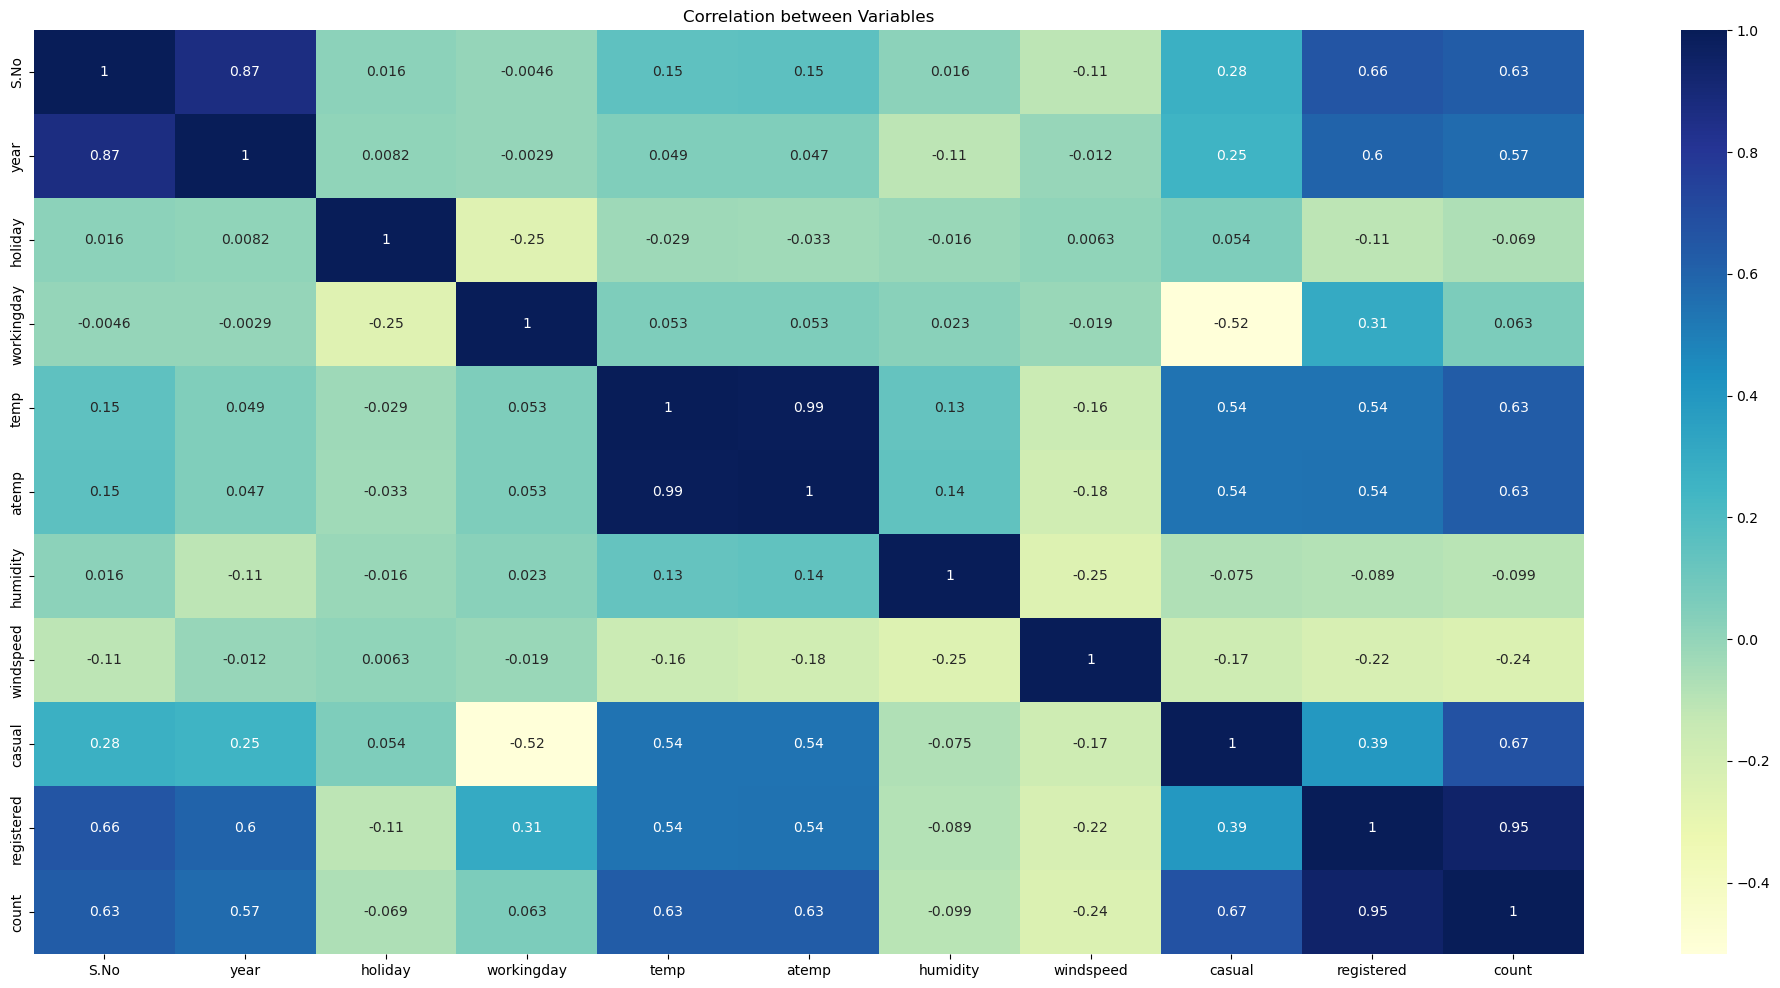

In [628]:
#Heatmap to see correlation between variables
plt.figure(figsize=(25, 12))
sns.heatmap(bike_rental_data_set.corr(), cmap='YlGnBu', annot = True)
plt.title("Correlation between Variables")
plt.show()

In [629]:
## Total Count is highlty correlated with temp, atemp, causual, registred, S.No

In [630]:
# Remove data from the data set which is not required
bike_rental_data_set=bike_rental_data_set.drop(['S.No','Data_Time','casual', 'registered','atemp'], axis=1)
bike_rental_data_set.head()

,season,year,month,holiday,weekday,workingday,weather_condition,temp,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


# Data Prepration


In [631]:
# Get the dummy variables for month, season, weather_condition, weekday
months=pd.get_dummies(bike_rental_data_set.month,drop_first=True)
weekdays=pd.get_dummies(bike_rental_data_set.weekday,drop_first=True)
weather_situation=pd.get_dummies(bike_rental_data_set.weather_condition,drop_first=True)
seasons=pd.get_dummies(bike_rental_data_set.season,drop_first=True)

In [632]:
# Concat with with data_set
bike_rental_data_set = pd.concat([months,weekdays, weather_situation, seasons, bike_rental_data_set], axis = 1)
bike_rental_data_set.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,year,month,holiday,weekday,workingday,weather_condition,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [633]:
bike_rental_data_set.columns

Index(['Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct',
       'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Light Snow',
       'Mist + Cloudy', 'spring', 'summer', 'winter', 'season', 'year',
       'month', 'holiday', 'weekday', 'workingday', 'weather_condition',
       'temp', 'humidity', 'windspeed', 'count'],
      dtype='object')

In [634]:
# Drop 'season','month','weekday','weather_condition' as we have created the dummies for it
bike_rental_data_set.drop(['season','month','weekday','weather_condition'], axis = 1, inplace = True)
bike_rental_data_set.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


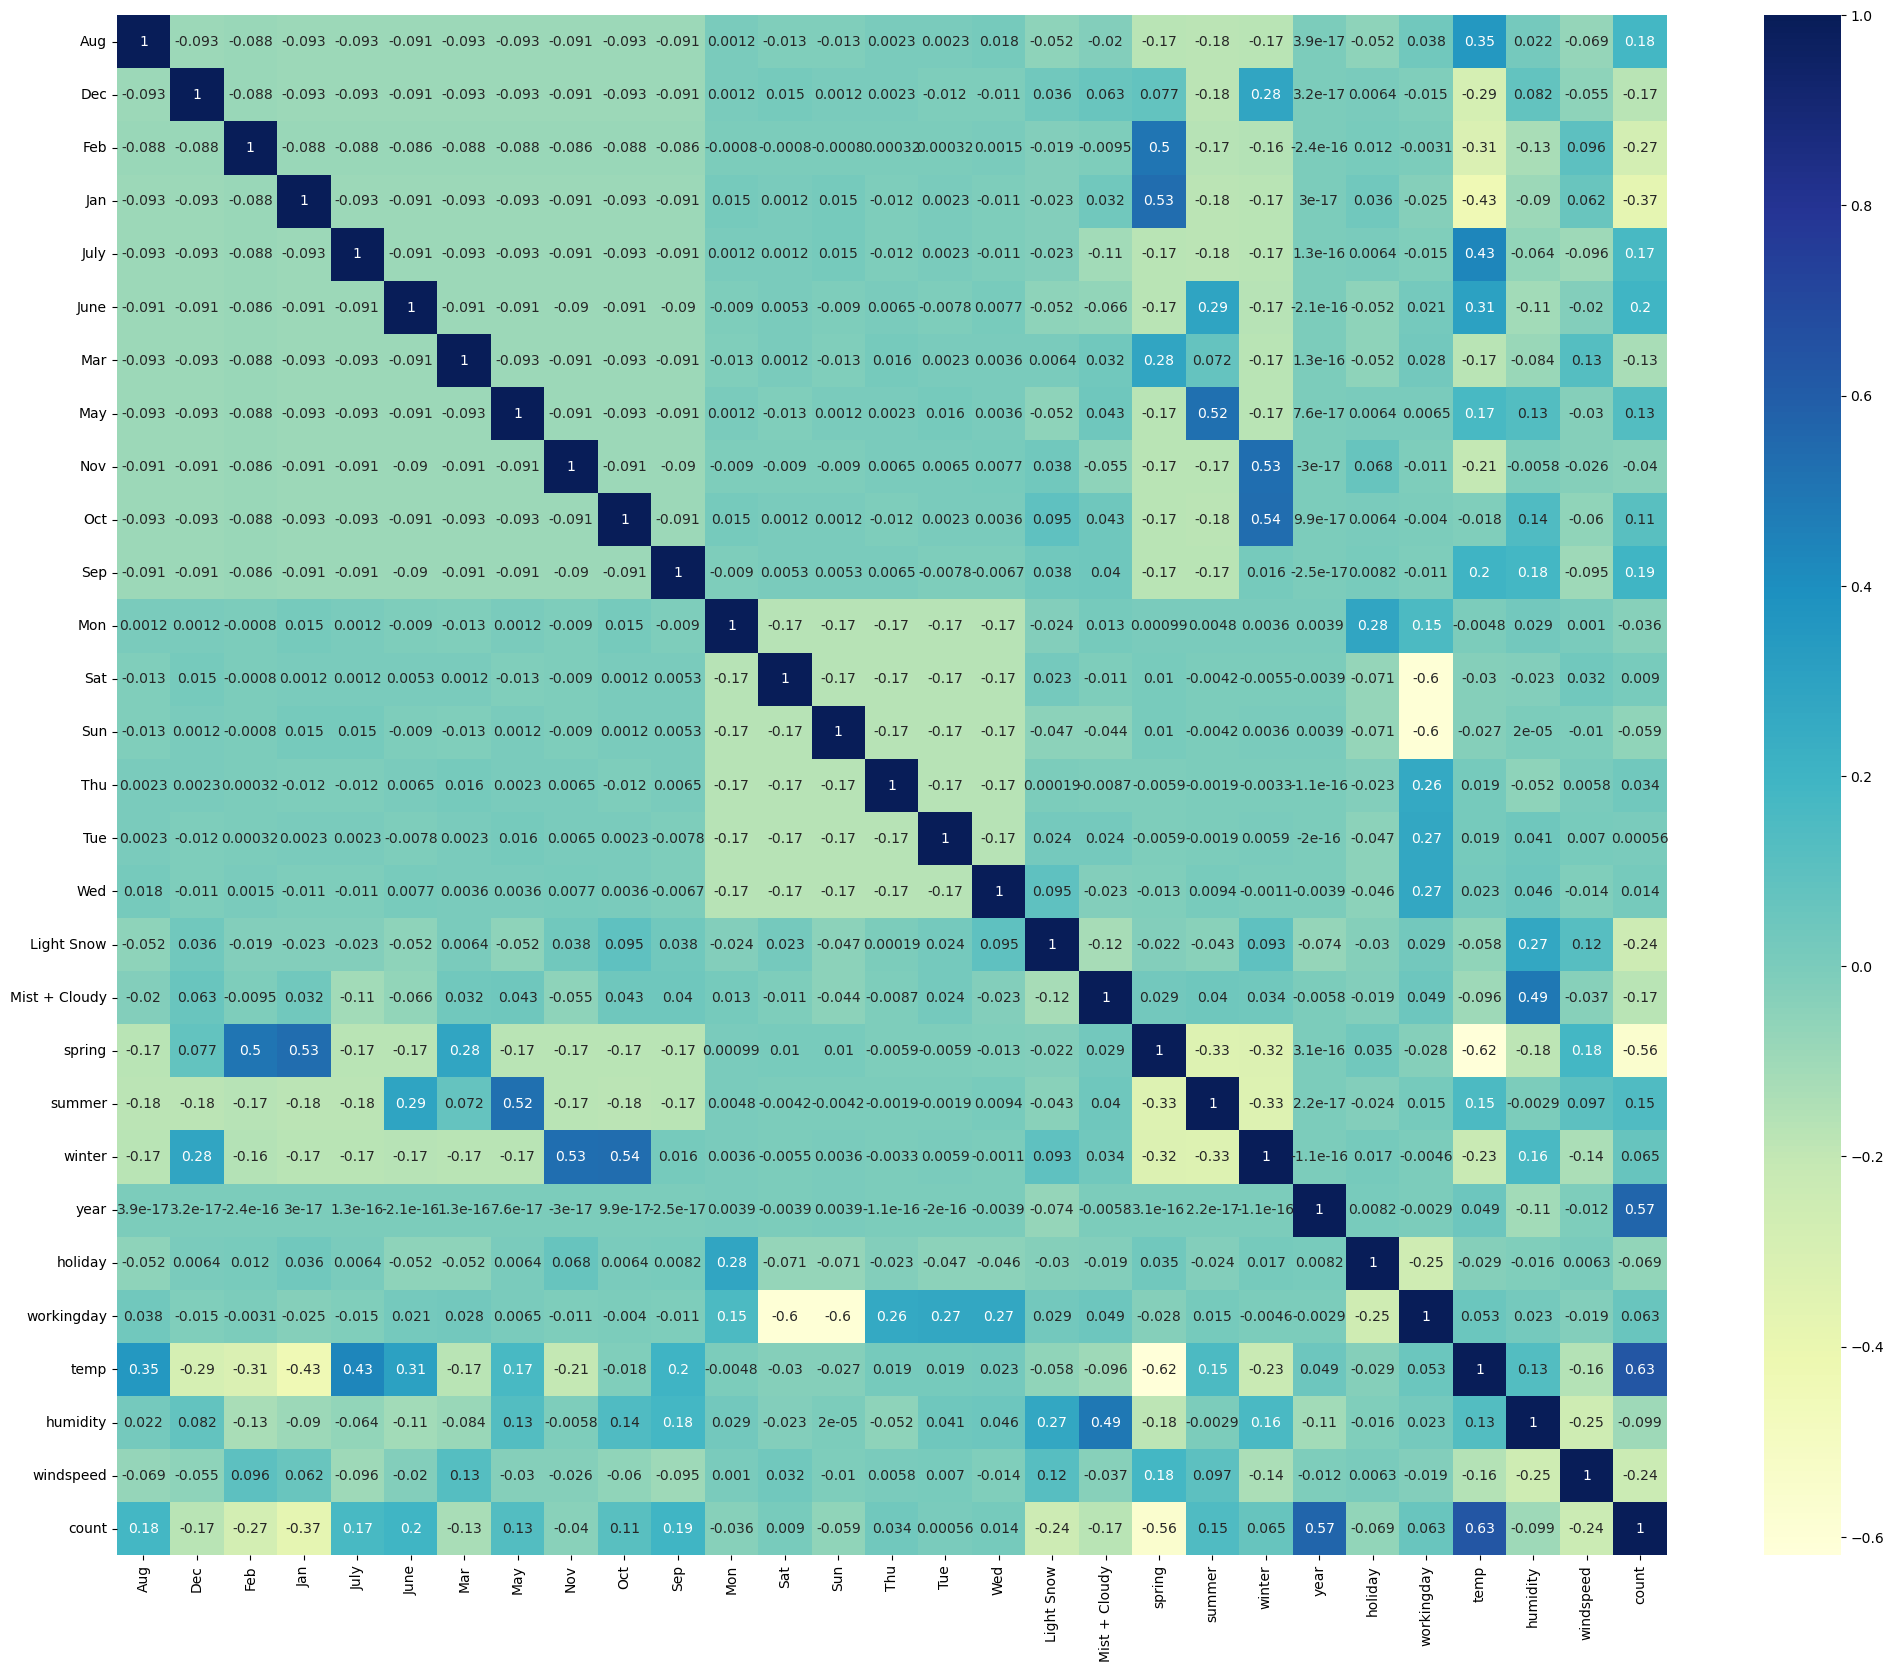

In [635]:
# Check the correlation between variables again
# Heatmap to see correlation between variables
plt.figure(figsize=(25, 20))
sns.heatmap(bike_rental_data_set.corr(), cmap='YlGnBu', annot = True)
plt.show()

In [636]:
# Summer Season, Month June to October and Temprature is highly correlated with count

# Split Train and Test data

In [637]:
bike_train, bike_test = train_test_split(bike_rental_data_set, train_size = 0.7, random_state = 100)

In [638]:
#Rows and columns after split
print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(220, 29)


## Rescaling Features
- Rescale the the variables using stadardization or normalization to make the obtained coeffiecents
    on the same scale

In [639]:
# Max-Min Scaling

#Instantiate an object
scaler = MinMaxScaler()

#Create a list of numeric variables
num_vars=['temp','humidity','windspeed','count']

#Fit on data
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0.345824,0.751824,0.380981,0.191095


In [640]:
# All the numeric variables are now mapped between 0 and 1
bike_train.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,...,0.243137,0.247059,0.247059,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,...,0.429398,0.431725,0.431725,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


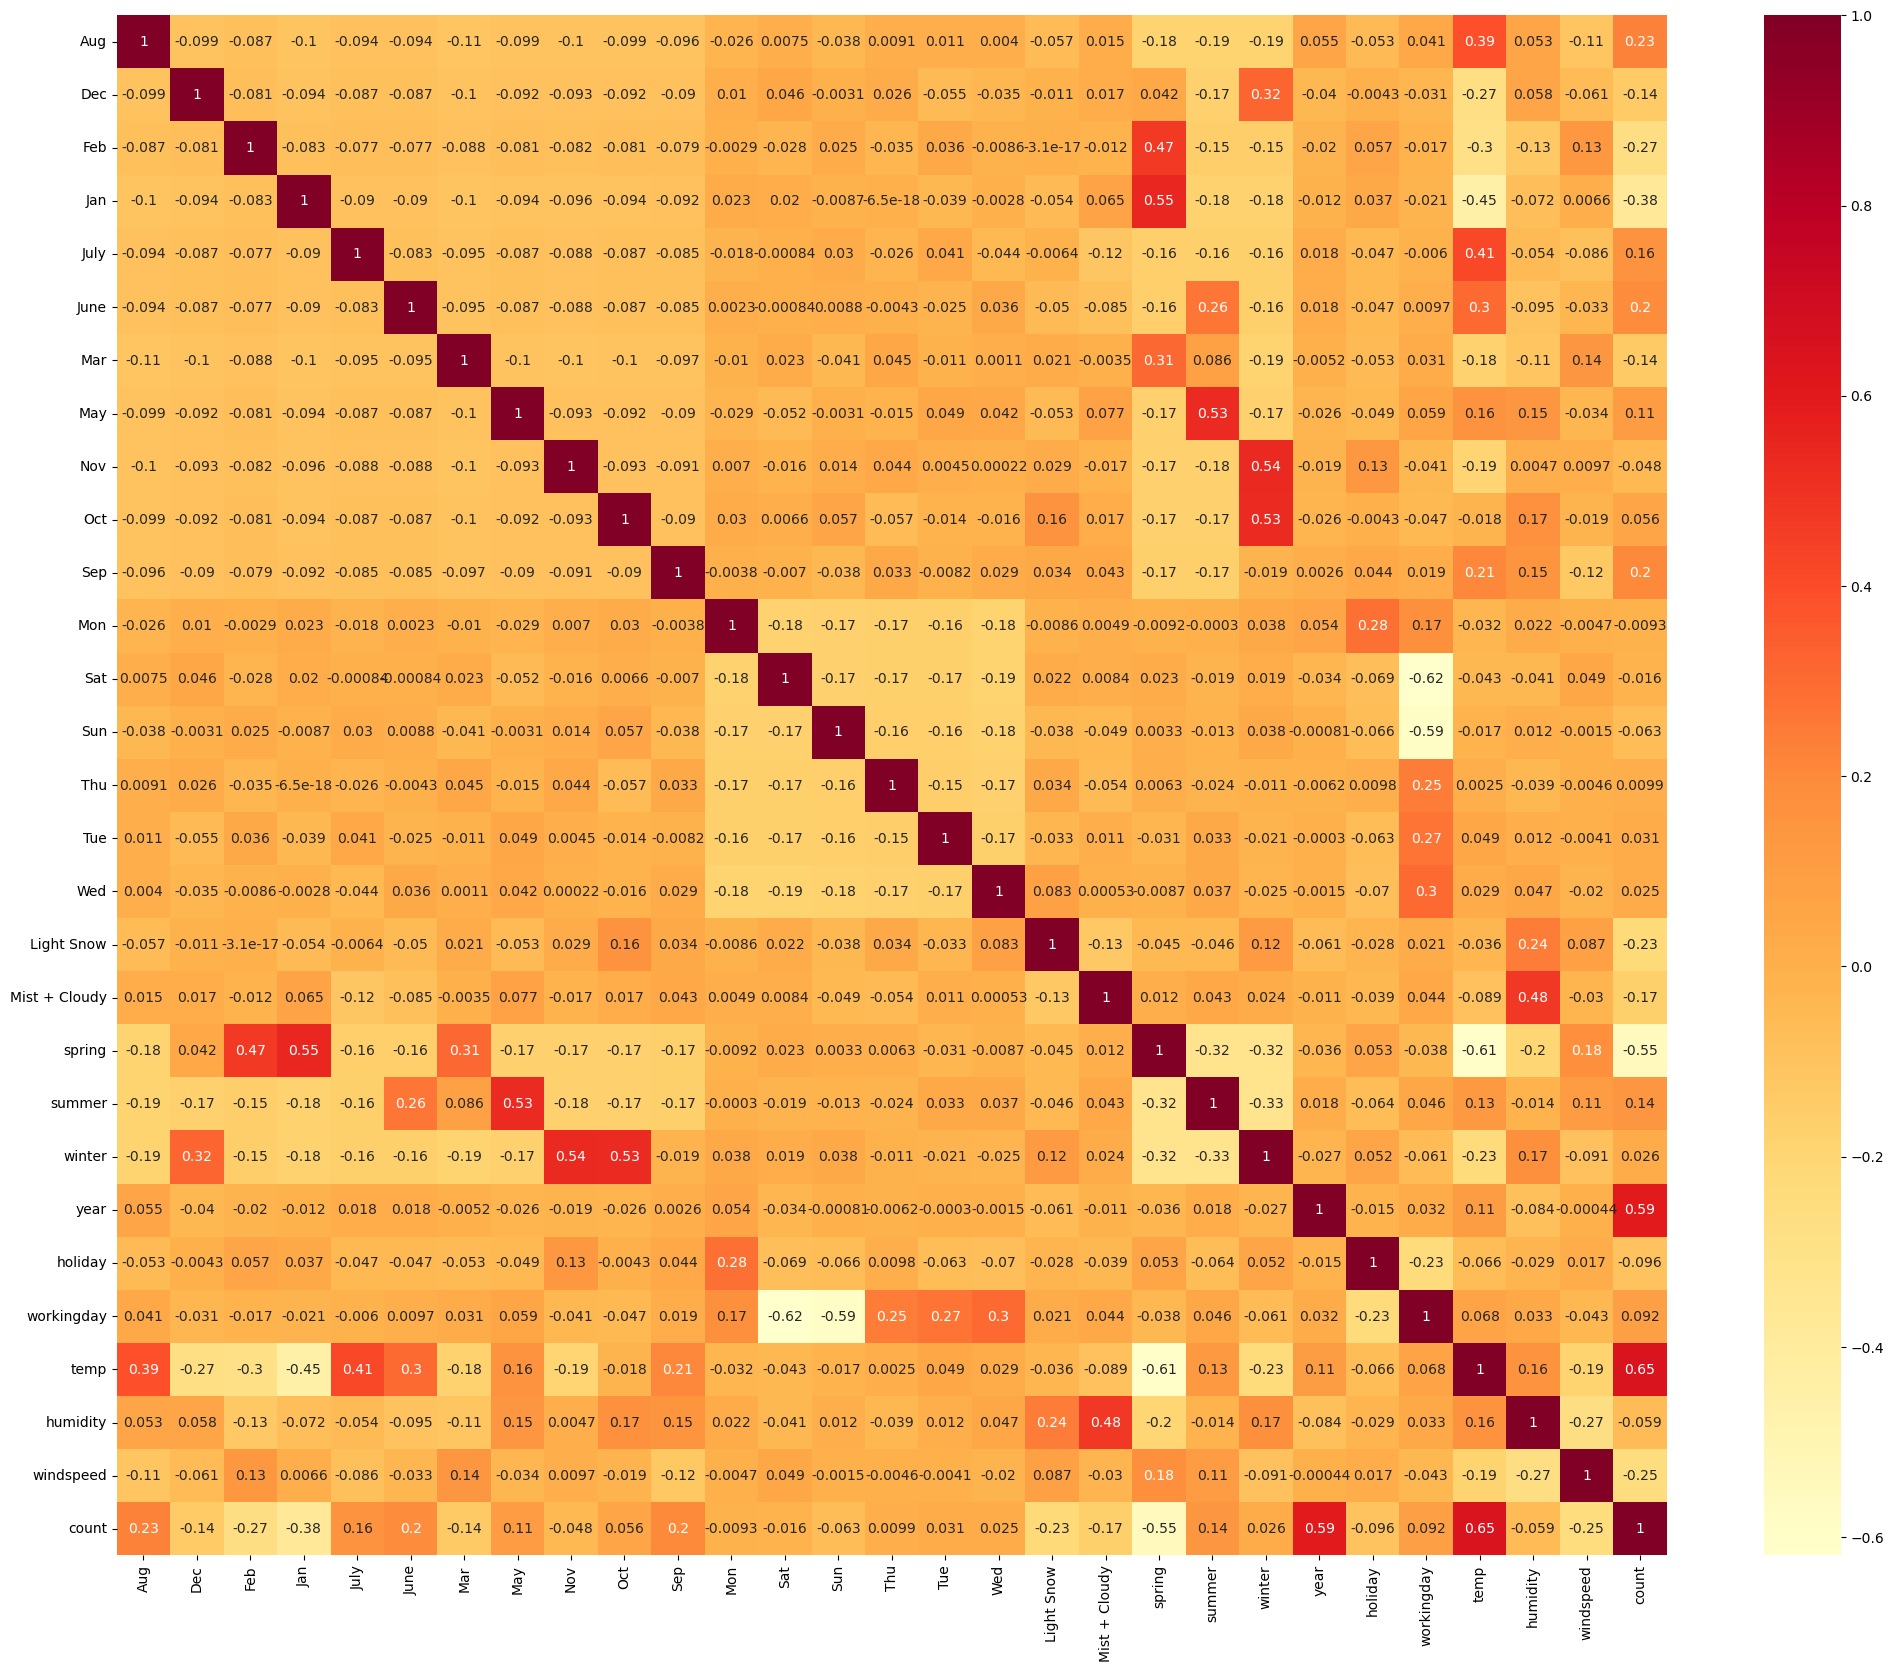

In [641]:
# Check the correlation  after scaling
plt.figure(figsize=(25, 20))
sns.heatmap(bike_train.corr(),cmap='YlOrRd',annot = True)
plt.show()

In [642]:
# Temp is hightly correlated with count
# August, Sept month is correlated with count

### X_train , y_train

In [643]:
#Divide the data into X and y
y_train = bike_train.pop('count')
X_train = bike_train

# Building Linear Model with RFE (Recursive Feature Elimination)

In [645]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [646]:
rfe = RFE(lm, n_features_to_select= 15)          
rfe = rfe.fit(X_train, y_train)

In [647]:
#List of variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 7),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('July', True, 1),
 ('June', False, 10),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', False, 3),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 13),
 ('Tue', False, 9),
 ('Wed', False, 12),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [648]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['July', 'Sep', 'Sat', 'Sun', 'Light Snow', 'Mist + Cloudy', 'spring',
       'summer', 'winter', 'year', 'holiday', 'workingday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

In [649]:
#Columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'Jan', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon',
       'Thu', 'Tue', 'Wed'],
      dtype='object')

## Building model using statsmodel, for the detailed statistics

In [650]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)
# Running the linear model 
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 15 Aug 2023   Prob (F-statistic):          2.11e-191
Time:                        19:42:58   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1995      0.028      7.200

### Checking VIF
 - Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other

In [651]:
#Drop the constant term B0
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,workingday,50.68
2,Sat,12.20
3,Sun,11.79
6,spring,5.02
12,temp,3.62
8,winter,3.49
10,holiday,2.91
7,summer,2.62
13,humidity,1.91
5,Mist + Cloudy,1.57


# 'workingday' variable can be dropped as its insignificant by looking at very High VIF

In [652]:
#Drop workingday
X_train_new1 = X_train_rfe.drop(["workingday"], axis = 1)
#Build a model without workingday
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 15 Aug 2023   Prob (F-statistic):          2.11e-191
Time:                        19:42:58   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2832      0.034      8.300

In [653]:
#Drop the constant and Calculate VIF
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,humidity,28.25
11,temp,16.06
13,windspeed,4.68
6,spring,4.03
8,winter,3.36
7,summer,2.79
5,Mist + Cloudy,2.30
9,year,2.08
0,July,1.59
1,Sep,1.39


## 'humidity' variable can be dropped as its insignificant by looking at very high VIF

In [654]:
#Drop humidity
X_train_new2 = X_train_lm1.drop(["humidity"], axis = 1)

#Build a model
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Tue, 15 Aug 2023   Prob (F-statistic):          1.28e-188
Time:                        19:42:58   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2037      0.029      6.972

In [655]:
#Drop the constant and calculate VIF
X_train_lm2=X_train_lm2.drop(['const'],axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,temp,5.18
12,windspeed,4.63
7,summer,2.24
6,spring,2.13
9,year,2.07
8,winter,1.84
0,July,1.59
5,Mist + Cloudy,1.56
1,Sep,1.34
2,Sat,1.23


## 'Sat' variable seems to be insignificant, High p value . We can drop it

In [656]:
#Drop the sat column
X_train_new3=X_train_lm2.drop(['Sat'],axis=1)

# Adding a constant variable 
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.9
Date:                Tue, 15 Aug 2023   Prob (F-statistic):          1.45e-189
Time:                        19:42:58   Log-Likelihood:                 507.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     497   BIC:                            -934.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2060      0.029      7.074

In [657]:
#Drop constant 
X_train_lm3=X_train_lm3.drop(['const'],axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,5.14
11,windspeed,4.60
6,summer,2.24
5,spring,2.11
8,year,2.07
7,winter,1.81
0,July,1.59
4,Mist + Cloudy,1.56
1,Sep,1.34
2,Sun,1.18


## 'windspeed' seems to be insignificant,by looking at high VIF and negative correlation with count. Lets drop it

In [658]:
#Drop July
X_train_new4= X_train_lm3.drop(['windspeed'], axis=1)
#Build a model
X_train_lm4=sm.add_constant(X_train_new4)
lm4=sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     220.2
Date:                Tue, 15 Aug 2023   Prob (F-statistic):          2.83e-183
Time:                        19:42:58   Log-Likelihood:                 489.93
No. Observations:                 510   AIC:                            -955.9
Df Residuals:                     498   BIC:                            -905.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1567      0.029      5.424

## Conclusions
    - A low p-value less than .05 indicates that Null Hypothesis can be rejected
    - High VIF leads to multicollininearity. VIF less than 5 is a good value
    - R-squared tells the degree of relationship between Model and Dependentant variables on scale of 0-100%.
       In out case it is 82.9%
    - Adjusted R-Squared Adjust the number of terms in the model . In our case it is 82.6%

In [659]:
#Drop constant
X_train_lm4= X_train_lm4.drop(['const'], axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X =X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
10,temp,4.27
8,year,2.06
6,summer,1.95
7,winter,1.61
0,July,1.59
4,Mist + Cloudy,1.56
5,spring,1.43
1,Sep,1.34
2,Sun,1.18
3,Light Snow,1.07


In [660]:
X_train_lm5=sm.add_constant(X_train_lm4)
X_train_lm5

,const,July,Sep,Sun,Light Snow,Mist + Cloudy,spring,summer,winter,year,holiday,temp
576,1.0,1,0,0,0,0,0,0,0,1,0,0.815169
426,1.0,0,0,0,0,1,1,0,0,1,0,0.442393
728,1.0,0,0,1,0,0,1,0,0,1,0,0.245101
482,1.0,0,0,0,0,1,0,1,0,1,0,0.395666
111,1.0,0,0,0,0,1,0,1,0,0,0,0.345824
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,0,0,0,0,0,0,0,0,1,0,0.863973
53,1.0,0,0,0,0,0,1,0,0,0,0,0.202618
350,1.0,0,0,0,0,1,0,0,1,0,0,0.248216
79,1.0,0,0,0,0,1,0,1,0,0,0,0.462664


In [661]:
#y train predicted
y_train_pred = lm4.predict(X_train_lm5)

<Figure size 640x480 with 0 Axes>

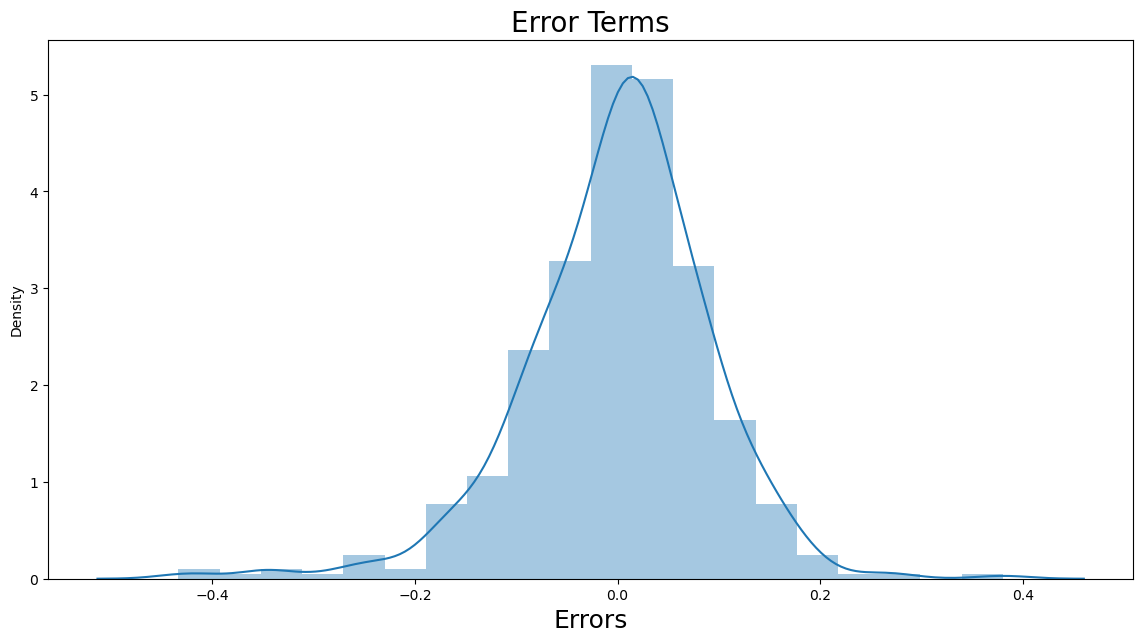

In [662]:
# Plot the histogram of the error terms
fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()


### Errors are normaly Distributed

In [663]:
bike_test.columns

Index(['Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct',
       'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Light Snow',
       'Mist + Cloudy', 'spring', 'summer', 'winter', 'year', 'holiday',
       'workingday', 'temp', 'humidity', 'windspeed', 'count'],
      dtype='object')

## Making Predictions

In [664]:
#Create a list of numeric variables
num_vars=['temp','humidity','windspeed','count']

#Fit on data
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()


,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0.511964,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0.817246,0.314298,0.537414,0.569029


In [665]:
#Dividing into X_test and y_test
y_test = bike_test.pop('count')
X_test = bike_test
X_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Mist + Cloudy,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,...,0.318182,0.254545,0.263636,0.236364,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,...,0.466833,0.436599,0.441609,0.425817,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474


In [666]:
#Columns
X_train_new4.columns

Index(['July', 'Sep', 'Sun', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter', 'year', 'holiday', 'temp'],
      dtype='object')

In [667]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new4.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,July,Sep,Sun,Light Snow,Mist + Cloudy,spring,summer,winter,year,holiday,temp
184,1.0,1,0,0,0,1,0,0,0,0,1,0.831783
535,1.0,0,0,0,0,0,0,1,0,1,0,0.901354
299,1.0,0,0,0,0,1,0,0,1,0,0,0.511964
221,1.0,0,0,0,0,0,0,0,0,0,0,0.881625
152,1.0,0,0,0,0,0,0,1,0,0,0,0.817246


In [668]:
# Making predictions
y_pred = lm4.predict(X_test_new1)

In [669]:
#Evaluate R-square for test
r2_score(y_test,y_pred)

0.8115878724384957

In [671]:
# Find Adjusted R^2
#Adjusted_R_sq = 1 - (1- R2)* (n-1)/(n-p-1)
#n =sample size , p = number of independent variables

Adjusted_R_sq = 1 - (1 - .811)*(12-1)/(12-1-1)
print(Adjusted_R_sq)

0.7921


## Model Evaluation

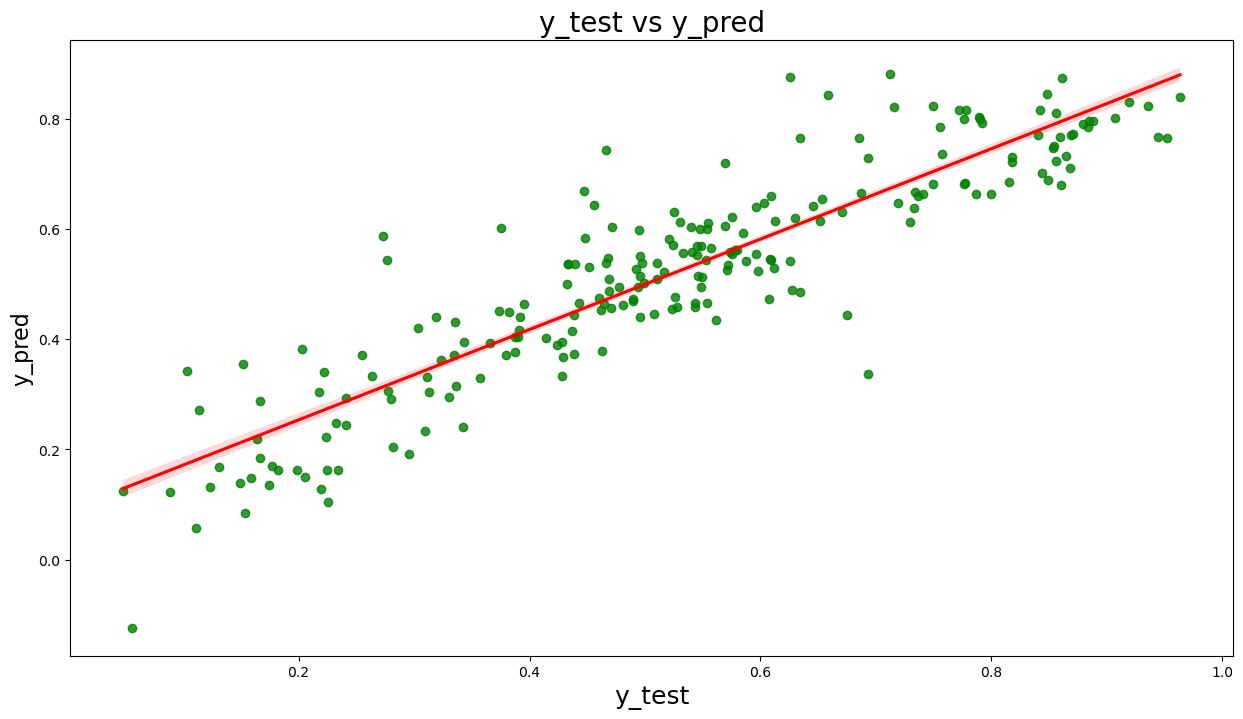

In [670]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "green"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

# Result and Comparison between Train and Test model
 - Train R^2 = 82.9 %
 - Train Adjusted R^2 = 82.6
 - Test R^2 = 81.15 %
 - Test Adjusted R^2 = 79.21%
 
 As per Above stats This is a Good Model

 

# Interpretetion
 - Temperature has highest coefficient of .5026 . This means if temperature increases by one unit then
   Increase in rental will be .5026
 - There are negative coefficients which suggest that if independant variable increases then dependant variable
   will decreases  
 - During Summer Season , Bike Rentals are more in demand
 - Spring season has negative coefficients and negatively correlated to bike rentals. So we can give some offers       there to increase the demand
 - Now seeing to weathersit variable, we have got negative coefficients for Mist +cloudy and Lights now weather
  
  
